<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, it will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- The task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">00 | Libraries</h1>

---

Import all the libraries needed to complete tasks in this challenge.

In [150]:
import numpy as np # For numerical computing in Python
import pandas as pd # For data structuring, manipulation and analysis in Python
import matplotlib.pyplot as plt # To create visualizations in Python
import matplotlib.dates as mdates # For date-related functionalities in MatPlotLib
import seaborn as sns # For data visualization in high-level interface
import plotly.express as px # High-level interface for interactive visualization in Python

import warnings
warnings.filterwarnings('ignore') # For cleaner output

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

The task is to load and analyze financial data, which is fundamental for effective portfolio management.

## 01 | Data Extraction

---

Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

In [46]:
draft = pd.read_csv('asset_price_data.csv')
data = pd.DataFrame(draft)

01.01 | Data Exploration (first impressions)

In [14]:
data.head() # I like to check how the dataframe looks like, before anything else

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [15]:
data.info() # I like using _.info to check for dimensions and value types simultaneously

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    783 non-null    object 
 1   Asset1  770 non-null    float64
 2   Asset2  770 non-null    float64
 3   Asset3  770 non-null    float64
 4   Asset4  734 non-null    float64
 5   Asset5  763 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.8+ KB


01.02 | Columns Standardization

In [17]:
# We use Pandas to convert values in 'date' column to actual date-time objects
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True) # We set 'date' as the index column

In [41]:
# Finally, we round all values in the dataframe to only 2 decimals, to aid readability
data = data[['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']].apply(lambda x: x.round(2))

01.03 | Copy, as best practices

In [43]:
df = data.copy()

## 02 | Data Cleaning

02.01 | Checking Null Values

In [51]:
df.isna().sum()

Asset1    13
Asset2    13
Asset3    13
Asset4    49
Asset5    20
dtype: int64

In [323]:
df = df.ffill()

Why Use Forward Fill (ffill)?

Forward fill (ffill) is used in financial data to maintain consistency by assuming that asset values remain unchanged until new data is recorded, especially on non-trading days like weekends or holidays. It helps avoid distorting trends that could arise from replacing missing values with constants, zeros, or averages, making it a logical choice for market data where prices often stay the same for short periods.

In [324]:
df.isna().sum()

Asset1         0
Asset2         0
Asset3         0
Asset4         0
Asset5         0
Total Value    0
dtype: int64

02.02 | Checking Duplicates

In [325]:
df.duplicated().sum()

13

In [68]:
data['date'].duplicated().sum() # To check if there are days duplicated

0

Why not drop duplicated rows here?

Keeping these rows ensures a more accurate, granular data over time, which is essential for financial analysis. Even if the duplicated prices are result of some error, they could still reflect a potential real situation (market stability). Since the dates are unique and there are no duplicated days, removing these rows could obscure trends and lose valuable temporal information, which is important for financial portfolio analysis.

02.03 | Checking Empty Spaces

In [67]:
df.eq(" ").sum()

Asset1    0
Asset2    0
Asset3    0
Asset4    0
Asset5    0
dtype: int64

## 03 | Relative Normalization and Visualization

---

Visualize this data through a time series graph. The integrity of the analysis depends heavily on the ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

03.01 | Statistical Information for Numerical Columns

In [70]:
df.describe().round(2)

,Asset1,Asset2,Asset3,Asset4,Asset5
count,783.00,783.00,783.00,783.00,783.00
mean,248.94,76.04,31.46,327.34,54.10
std,6.86,13.59,3.29,13.42,8.17
min,229.70,48.52,22.90,272.79,37.34
25%,246.85,64.76,29.28,318.75,49.27
50%,250.62,71.91,30.65,326.70,52.73
75%,253.37,87.35,33.69,340.11,59.38
max,259.11,104.66,39.12,345.71,71.05


This summary gives useful statistical insights into the asset prices, such as their averages, variability, and distribution. However, it doesn't help us visualize the relative changes in price over time. To effectively compare the assets' performance, we need to normalize the data so that all assets start at the same uniform value (let's say, a hundred). This allows us to focus on the percentage change for each asset, making it easier to compare their growth or decline trends over time on a common scale. This approach ensures that we can clearly visualize and analyze the relative movements of the assets.

03.02 | Relative Normalization

In [95]:
base_value = df.iloc[0] # value of each asset on their first day
df2 = df / base_value * 100 # divide each value on the dataframe by it's corresponding first day value
# Starting at 100, it will tell us how much prices went up or down relative to their first value
df2.describe().round(2)

,Asset1,Asset2,Asset3,Asset4,Asset5
count,783.00,783.00,783.00,783.00,783.00
mean,107.53,136.07,122.65,108.06,106.31
std,2.96,24.33,12.83,4.43,16.05
min,99.22,86.83,89.28,90.05,73.37
25%,106.62,115.90,114.17,105.22,96.82
50%,108.25,128.69,119.49,107.85,103.62
75%,109.44,156.32,131.35,112.27,116.69
max,111.92,187.29,152.51,114.12,139.61


03.03 | Data Visualization

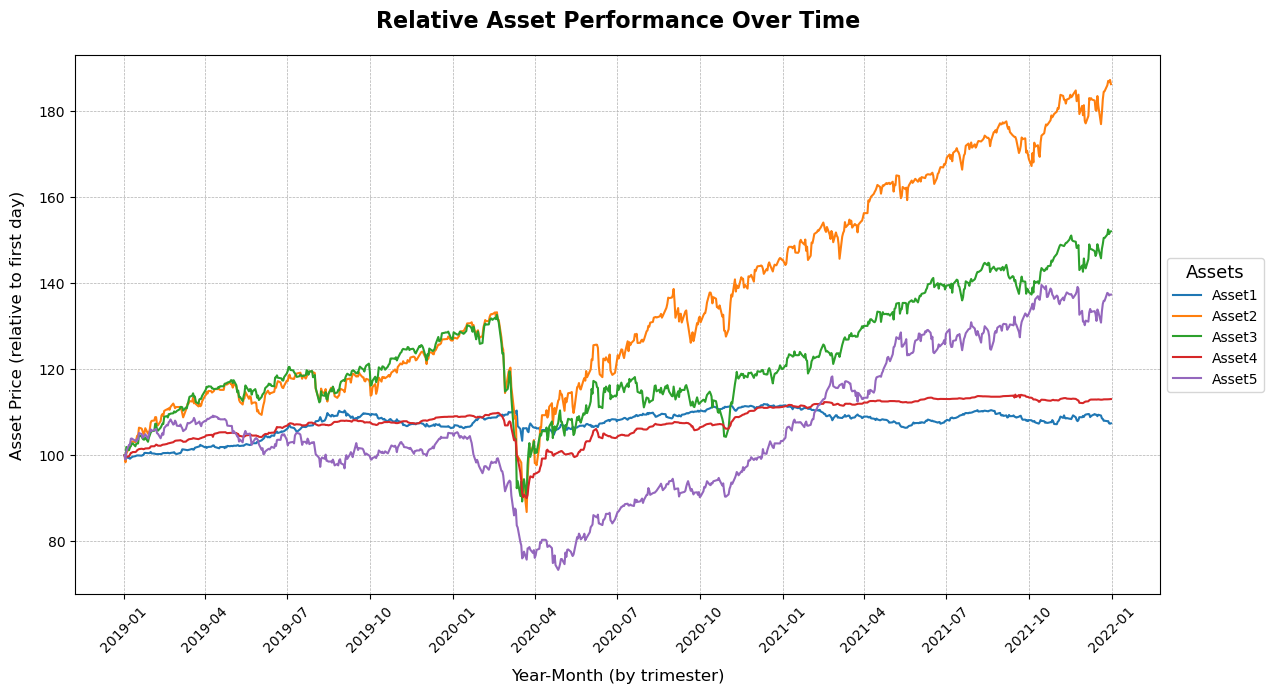

In [101]:
plt.figure(figsize=(14, 7)) # Set plot size

# Add assets data for line plot
sns.lineplot(data=df2, x='date', y='Asset1', label='Asset1')
sns.lineplot(data=df2, x='date', y='Asset2', label='Asset2')
sns.lineplot(data=df2, x='date', y='Asset3', label='Asset3')
sns.lineplot(data=df2, x='date', y='Asset4', label='Asset4')
sns.lineplot(data=df2, x='date', y='Asset5', label='Asset5')

# Plot values for the beginning of every trimester
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=3))

plt.title('Relative Asset Performance Over Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year-Month (by trimester)', fontsize=12, labelpad=10)
plt.ylabel('Asset Price (relative to first day)', fontsize=12, labelpad=10)
plt.legend(title='Assets', title_fontsize='13', fontsize='10', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, which='both', linestyle='--', linewidth=0.5) # Chart grids to aid visualization
plt.xticks(rotation=45) # Slight rotation for x-axis labels
plt.show()

## 04 | First Insights

---

The time series analysis reveals potential trends on portfolio composition and asset allocation.

**Asset 1** and **Asset 4** were the most stable throughout the period, both growing to around 110%. These assets did not experience large fluctuations, indicating their stability, but they also didn’t see explosive growth. This suggests they are low-risk, steady assets, likely tied to sectors less affected by market volatility, such as utilities or consumer staples. Their relatively moderate growth implies they could be ideal for conservative portfolio strategies where stability is prioritized over high returns.

**Asset 2** and **Asset 3** displayed more volatility, behaving similarly until the pandemic hit, after which they diverged. Asset 2 saw a sharp surge to over 180%, while Asset 3 grew to around 150%. This divergence indicates differing sensitivities to external factors, with Asset 2 likely belonging to a high-growth sector (e.g., technology or healthcare), which thrived during the crisis, while Asset 3 followed a similar recovery trajectory, but to a lesser extent. These assets carry higher risk due to their volatility, but they also offer higher potential returns, making them better suited for an aggressive, growth-focused portfolio.

**Asset 5** was the most unstable, experiencing a significant drop during the pandemic before recovering to just below 140%. This suggests a higher degree of risk, possibly tied to sectors like travel or luxury goods, which were severely impacted by the pandemic. The strong recovery post-crisis indicates that while this asset is volatile, it can also experience sharp rebounds, making it a higher-risk, higher-reward option for investors.

**In summary**, this analysis highlights how each asset performed over time, showing varying levels of stability and growth potential. These insights are valuable as we continue to explore their roles in portfolio management.

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

Calculate daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

The daily percentage return of an asset represents the change in its value from one day to the next, expressed as a percentage. It is calculated using the formula:

$$
\text{Daily Percentage Return} = \frac{\text{Price on Day 2} - \text{Price on Day 1}}{\text{Price on Day 1}} \times 100
$$

This metric helps investors understand the day-to-day price movements of an asset. A positive return indicates the asset's price increased, while a negative return shows a decrease in price. By calculating these returns for each asset, we can analyze their individual performance and compare how they move relative to each other over time.

In the next step, we will calculate the daily percentage returns for each of our assets and explore how they correlate with each other.

## 05 | Daily Percentage Returns

05.01 | Daily Percentage Returns Calculation

In [122]:
df3 = df2.apply(lambda x: (x.shift(-1) - x) / x * 100) # dataframe with daily returns
df3 = df3.fillna(0) # This will fill NaNs in the last row, simluating market stability for the last day

In [124]:
df3.round(2)

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,-0.20,-1.61,-0.58,-0.27,-0.94
2019-01-03,-0.28,2.09,2.55,-0.11,1.92
2019-01-04,-0.15,1.26,-0.73,0.19,1.48
2019-01-07,-0.15,0.11,0.69,0.36,-0.02
2019-01-08,0.20,1.28,0.23,0.41,1.40
...,...,...,...,...,...
2021-12-27,0.01,0.55,0.77,0.00,-0.11
2021-12-28,-0.49,-0.16,-0.69,0.02,-0.31
2021-12-29,-0.07,0.29,0.33,0.03,0.14


## 06 | Correlation Matrix

06.01 | Correlation Matrix Calculation

In [127]:
df4 = df3.corr()
df4.round(2)

,Asset1,Asset2,Asset3,Asset4,Asset5
Asset1,1.00,-0.09,-0.06,0.10,-0.11
Asset2,-0.09,1.00,0.85,0.53,0.59
Asset3,-0.06,0.85,1.00,0.51,0.56
Asset4,0.10,0.53,0.51,1.00,0.42
Asset5,-0.11,0.59,0.56,0.42,1.00


06.02 | Correlation Matrix Visualization

Text(0.5, 1.0, 'Assets Correlation Heatmap')

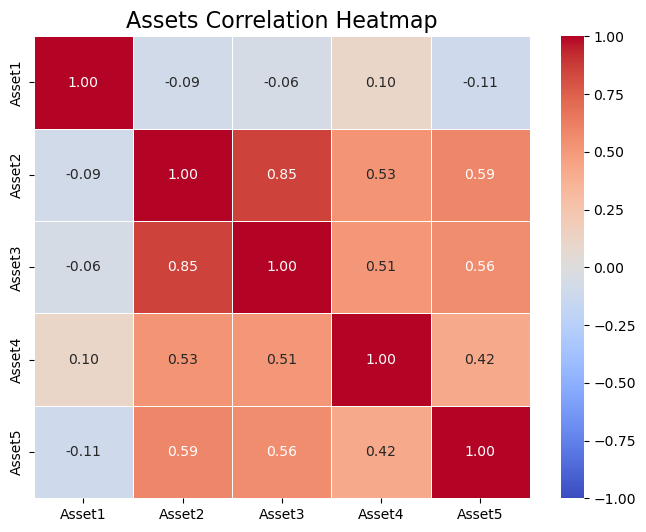

In [132]:
plt.figure(figsize=(8,6))
sns.heatmap(df4, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', vmin=-1, vmax=1)

plt.title('Assets Correlation Heatmap', fontsize=16)

06.03 | Correlation Insights

---
**Asset 2** is the most central asset in the correlation matrix, showing strong positive correlations with Assets 3 and 5, as well as moderate correlations with Assets 4 and 1. This suggests that **Asset 2 tends to move more in tandem with other assets**, particularly with Asset 3. On the other hand, **Asset 1** behaves almost independently of the other assets, displaying minimal correlation, either negative or positive. This characteristic could make Asset 1 an appealing choice for diversification within a portfolio, as it does not closely follow the trends of the other assets. Additionally, the **particularly strong correlation between Asset 2 and Asset 3** indicates that these two assets may have similar risk or return profiles, which could be an important factor for investors seeking diversification strategies.

The heatmap clearly shows a strong positive correlation between Asset 2 and Asset 3, which aligns with our observations in the time series graph. This indicates that these two assets have tended to move in the same direction. However, we hypothesize that this correlation might have weakened after the pandemic crash, as Asset 2 reached higher values.

To test this hypothesis, we could formulate the following:

**Null Hypothesis (H0)**: The correlation between Asset 2 and Asset 3 remained stable before and after the pandemic crash.

**Alternative Hypothesis (H1)**: The correlation between Asset 2 and Asset 3 weakened after the pandemic crash.

By analyzing the correlation before and after the crash, we can determine if our hypothesis holds true or if the relationship between these assets has changed.

## 07 | Hypothesis Testing

---

To analyze the correlation between Asset2 and Asset3 before and after the pandemic crash, we can use the minimum values of both assets as an arbitrary point of divergence. This choice is based on the observation that these minimums align with a significant change in their behavior (when they seem to start to diverge), as seen in the timeseries graph. By identifying the dates when the minimum values occurred, we can separate the data into two periods: before and after the crash. This allows us to test if the correlation between the assets was affected by the market downturn, offering a clearer understanding of how external events influenced their relationship.

07.01 | Featuring Selection

In [138]:
Asset2_min = df['Asset2'].min()
Asset3_min = df['Asset3'].min()

In [139]:
df.loc[df['Asset2'] == Asset2_min] # Lowest market value for Asset2 was on March 23rd 2020

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2020-03-23,246.14,48.52,23.17,272.79,38.55


In [141]:
df.loc[df['Asset3'] == Asset3_min] # Lowest market value for Asset3 was on March 18th 2020

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2020-03-18,239.38,52.02,22.9,276.45,38.7


In [144]:
before_crash = df3[df3.index < '2020-03-21'] # the 21st is the mid spot between both minimums
after_crash = df3[df3.index > '2020-03-21'] 

07.02 | Compared Correlation

In [146]:
before_crash[['Asset2', 'Asset3']].corr().iloc[0, 1].round(3)

0.858

In [147]:
after_crash[['Asset2', 'Asset3']].corr().iloc[0, 1].round(3)

0.852

## 08 | Visualization

08.01 | Static Scatter Plot

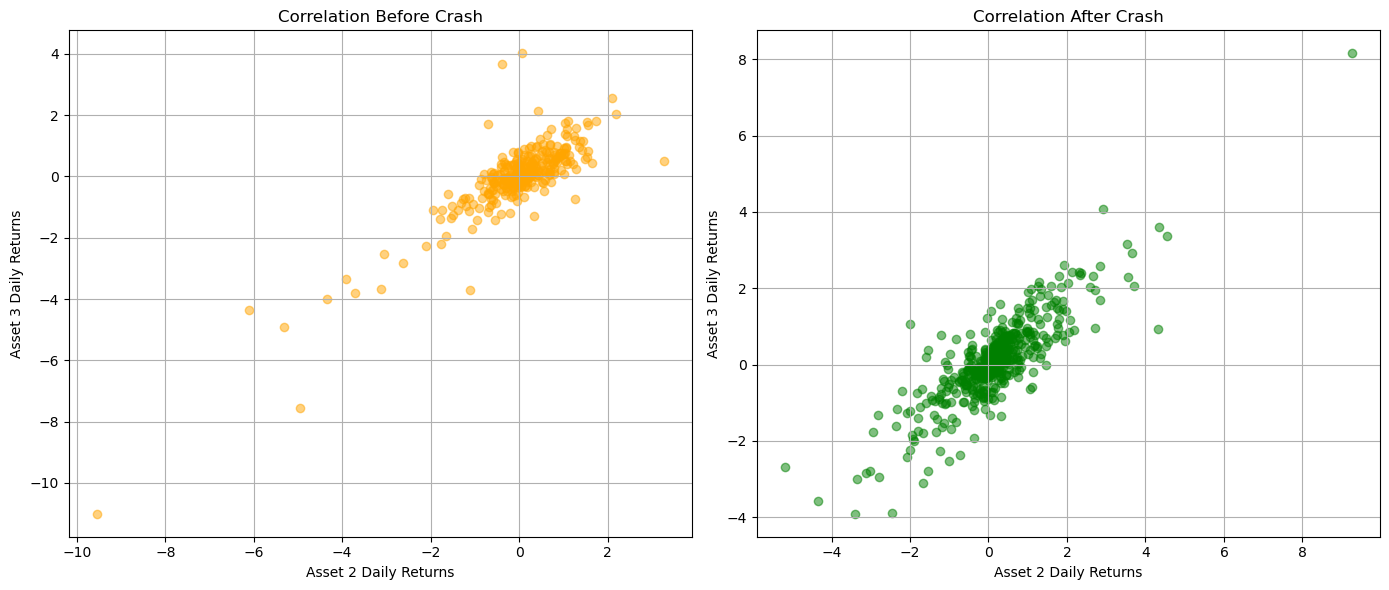

In [222]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(before_crash['Asset2'], before_crash['Asset3'], color='orange', alpha=0.5)
plt.title('Correlation Before Crash')
plt.xlabel('Asset 2 Daily Returns')
plt.ylabel('Asset 3 Daily Returns')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(after_crash['Asset2'], after_crash['Asset3'], color='green', alpha=0.5)
plt.title('Correlation After Crash')
plt.xlabel('Asset 2 Daily Returns')
plt.ylabel('Asset 3 Daily Returns')
plt.grid(True)

plt.tight_layout()
plt.show()

08.02 | Interactive Scatter Plot

---

Creating an interactive scatter plot to see the dates when hovered is useful here, because it allows you to explore the data dynamically. By hovering over the dots, you can instantly view the specific date associated with each data point, which helps in understanding the time-related context of asset price movements. This feature is especially valuable when analyzing trends, outliers, or other
patterns, as it enables you to correlate fluctuations in asset returns with specific dates, such as during market events or crises. Additionally, interactive plots allow for easier exploration of large datasets without losing track of individual data points.

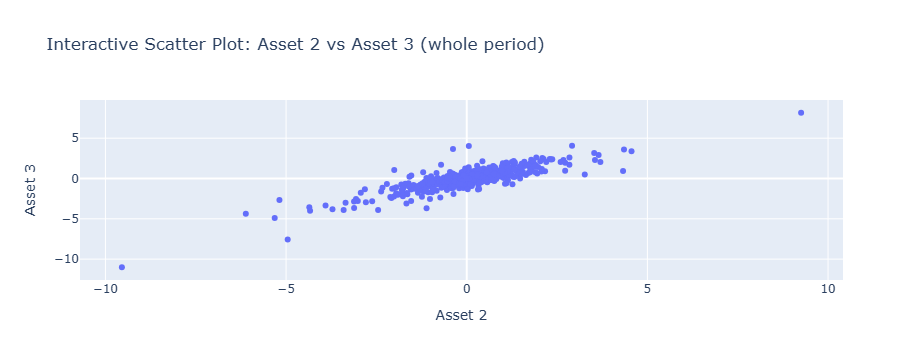

In [154]:
df3_reset = df3.reset_index()  # it won't work if date is the index (as previously set)

fig = px.scatter(df3_reset, 
                 x='Asset2', 
                 y='Asset3', 
                 hover_data={'date': True},  # Show date when hovering over a point
                 labels={'Asset2': 'Asset 2', 'Asset3': 'Asset 3'},
                 title="Interactive Scatter Plot: Asset 2 vs Asset 3 (whole period)")

fig.show()

## 09 | Further Insights

---

In the **static scatter plot**, we focus on the correlation between Asset 2 and Asset 3 before and after the crash. Although Asset 2 experienced a higher growth rate post-crash, the Pearson correlation between the two assets remains similar before (0.858) and after (0.852) the crash. This result led us to conclude that, **despite differing growth trajectories, the assets continued to follow similar patterns in their daily return changes**, and the correlation remained relatively stable.

In the **interactive scatter plot**, the quadrants provide insightful information as a framework to interpret the correlation between Asset 2 and Asset 3 over the entire period. I explain: we divide the chart into four quadrants: bottom-left, top-left, top-right, and bottom-right. These quadrants help visualize the relationship between the two assets, where the bottom-left quadrant shows both assets declining, the top-right quadrant indicates both assets rising, and the other quadrants show contrasting movements between the assets (rare movement, since they are strongly correlated).

Through the hover feature, we can observe that many data points in the bottom-left quadrant correspond to significant downturns, which occurred during the 2020 crash. Interestingly, some points in the top-right quadrant are from the same period, suggesting a rapid recovery, which shows the **resilience of these assets as they regained value quickly after the crash**. This behavior reinforces the idea that both assets were affected but displayed strong recovery potential.

Together, the static and interactive scatter plots offer a comprehensive view of how Asset 2 and Asset 3 behaved. While the static plot helps us visualize and test our hypothesis about changing correlation after crash, the interactive plot, with its quadrant-based insights, provides understanding of the assets’ resilience and their correlated movements throughout the whole period.

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

Tasks to complete in this exercise:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

## 10 | Preparing New Data Implementation

10.01 | Data Extraction

In [189]:
weights_draft = pd.read_csv('portfolio_weights.csv')

In [190]:
info_draft = pd.read_csv('asset_information_data.csv')

10.02 | Data Exploring (first impressions)

In [191]:
weights_draft.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [192]:
info_draft.head()

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [193]:
weights_draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    783 non-null    object 
 1   Asset1  783 non-null    float64
 2   Asset2  783 non-null    float64
 3   Asset3  783 non-null    float64
 4   Asset4  783 non-null    float64
 5   Asset5  783 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.8+ KB


In [194]:
info_draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Family  5 non-null      object
dtypes: object(2)
memory usage: 212.0+ bytes


In [217]:
weights = weights_draft.copy() # Copy as best practices

10.03 | Column Standardization

In [218]:
weights['date'] = pd.to_datetime(weights['date'])

In [219]:
weights.set_index('date', inplace=True)

10.04 | Data Cleaning

In [169]:
weights.isna().sum()

date      0
Asset1    0
Asset2    0
Asset3    0
Asset4    0
Asset5    0
dtype: int64

In [170]:
weights.duplicated().sum()

0

In [172]:
weights.eq(' ').sum()

date      0
Asset1    0
Asset2    0
Asset3    0
Asset4    0
Asset5    0
dtype: int64

## 11 | Area Chart of Assets Weight

**Asset weight** represents the percentage of the total value of a portfolio that is invested in a particular asset. For example, if your portfolio is worth 100,000 and you have 25,000 invested in Asset 1, the weight of Asset 1 in the portfolio would be 25% (or 0.25). This percentage shows the proportion of your total portfolio allocated to that specific asset.

**Asset Allocation** is the strategy of dividing an investment portfolio among different asset classes (such as stocks, bonds, real estate, or cash) based on factors like risk tolerance, time horizon, and investment goals. The goal is to balance risk and return by adjusting the weights of each asset class in the portfolio.

11.01 | Stacked Plot of Assets (Visualization)

---

The stacked area chart is the best option to visualize Asset Allocation because it clearly shows how the weight of each asset in the portfolio changes over time, while also making it easy to see the overall trend. Since the areas stack on top of each other, it shows the proportion of each asset relative to the total portfolio. This makes it easy to track how each asset grows or shrinks, and how the portfolio composition shifts over time, all in one view. It's especially useful for understanding how the total portfolio is made up at different points in time.








In [226]:
# Ensure assets are represented by their same respective colors as in the time series graph
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

In [250]:
# We can use the mean of every quarter since they are perfect representations of the asset weight
weights_vis = weights.resample('Q').mean() 

<Figure size 1600x600 with 0 Axes>

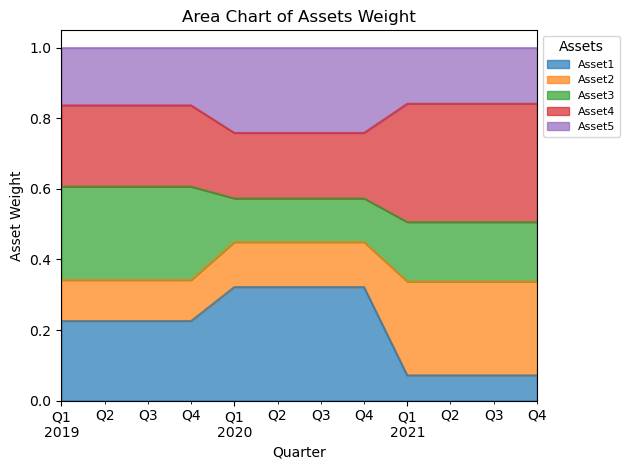

In [251]:
plt.figure(figsize=(16,6))
weights_vis.plot.area(stacked=True, color=colors, alpha=0.7)

plt.title('Area Chart of Assets Weight')
plt.ylabel('Asset Weight')
plt.xlabel('Quarter')
plt.legend(title='Assets', 
           bbox_to_anchor=(1, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

11.02 | Interpretation

---

At the beginning of each year, there are clear strategic shifts in asset allocation. For example, **in early 2020**, the weights adjusted significantly toward Assets 1 and 5, reflecting a pivot in strategy. Asset 1, with its increased allocation, might have been chosen for stability, suggesting a **focus on safeguarding returns during a potential uncertain market period like the Covid-19 Pandemics**. Interestingly, Asset 5 also saw a significant increase, hinting at a diversification effort or a calculated risk despite its historical volatility.

**In 2021**, we observe another shift: Assets 2 and 4 were given considerably more weight. This change suggests a **deliberate turn towards a higher-risk, potentially higher-reward approach**, aligning with the observed growth potential in Asset 2. Here, it seems that the strategy transitioned to capitalizing on growth opportunities while maintaining a balanced but opportunistic stance with Asset 4's increased weight. Each of these annual shifts indicates a responsive, adaptive strategy, aligning allocations with market conditions and portfolio goals for that year.

## 12 | Historical Cumulative Returns

---

The cumulative historical return of a portfolio shows how much the portfolio has grown or shrunk over time, taking into account all the changes in the value of the assets it holds. It starts with an initial value (like 100), calculates the daily changes in asset prices, and then combines those changes according to how much of each asset is in the portfolio. By adding up these daily changes, we get the total return over the period, showing how much the portfolio has gained or lost from the beginning to the end. Simply put, it tracks the overall performance of the portfolio over time, helping you understand its growth or decline.

12.01 | Creating New Dataframe

In [363]:
df5 = df3 * weights.values # Dataframe containing weighted daily returns

In [364]:
df5['Return'] = df5.sum(axis=1)

In [366]:
df5['Return'].iloc[0] = 100

In [368]:
df5['Return'] = df5['Return'].cumsum()

In [369]:
df5.head().round(3)

,Asset1,Asset2,Asset3,Asset4,Asset5,Return
date,,,,,,
2019-01-02,0.225,0.116,0.265,0.230,0.163,100.000
2019-01-03,-0.062,0.243,0.675,-0.026,0.314,101.144
2019-01-04,-0.034,0.147,-0.193,0.043,0.241,101.348
2019-01-07,-0.034,0.012,0.184,0.083,-0.003,101.590
2019-01-08,0.045,0.149,0.061,0.095,0.228,102.168


In [452]:
df5['Return'].describe().round(2)

count    783.00
mean     115.79
std        9.50
min       94.42
25%      109.13
50%      112.77
75%      123.41
max      134.52
Name: Return, dtype: float64

12.02 | Historical Cumulative Return Visualization

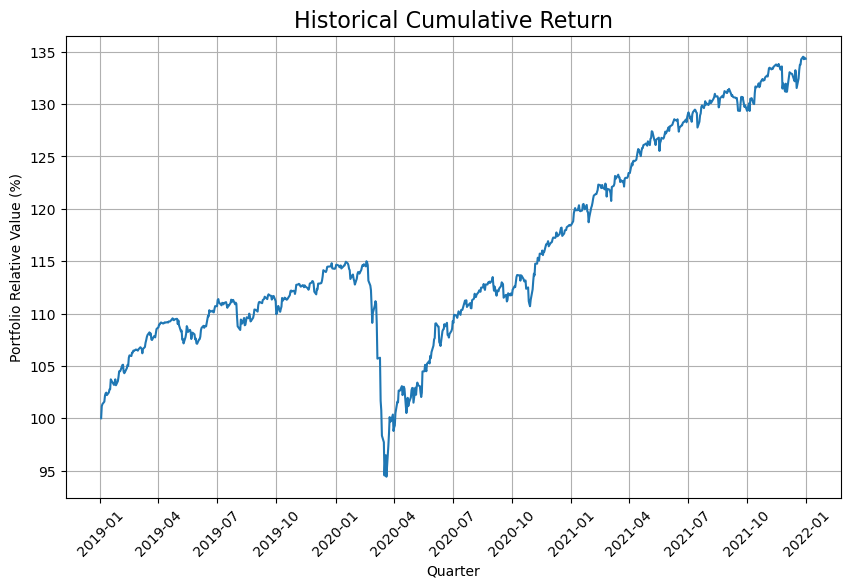

In [382]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df5.Return)
plt.title('Historical Cumulative Return', fontsize=16)
plt.xlabel('Quarter')
plt.ylabel('Portfolio Relative Value (%)')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
plt.xticks(rotation=45)
plt.grid(True)

The portfolio's cumulative returns show a generally positive trend over time, with the value fluctuating between 94.42% and 134.52% of its initial value. On average, the portfolio has grown by 115.79%, with a standard deviation of 9.5%, indicating moderate volatility in its performance.

The first quarter of 2020 saw a notable downturn, as the portfolio dropped from 115% to 95% of its initial value, reflecting the market turbulence during that period. However, by the start of the third quarter, the portfolio had regained some of its losses, reaching 110% of the initial value. This upward momentum continued throughout the rest of the year, with the portfolio finishing 2021 at 135% of its starting value.

This performance indicates resilience in the portfolio, with a capacity for recovery following significant drawdowns. Despite the volatility, the portfolio managed to deliver consistent growth, particularly in the second half of 2020 and into 2021, resulting in a strong overall return by the end of the analysis period.

## 13 | Annualized Return

---

The annualized return is a way to express an investment's return as if it had been earned at a consistent rate over a year, regardless of the actual period it was held. It is useful for comparing different investments over varying time periods by standardizing returns into an annual figure. Essentially, it takes the total growth of the investment and spreads it over a year, providing a clearer picture of its performance on an annual basis. The formula for annualized return is:

$$
\text{Annualized Return} = \left( \frac{{\text{Final Value}}}{{\text{Initial Value}}} \right)^{\frac{1}{T}} - 1
$$

where \(T\) is the number of years. This allows investors to better assess the potential long-term performance of an investment.

---

In [391]:
ann_ret = (((df5['Return'][-1] / df5['Return'][0]) ** (1/3) - 1) * 100).round(3)
print(f'The Annualized Return for this portfolio is: {ann_ret} %')

The Annualized Return for this portfolio is: 10.336 %


Given that this is a balanced portfolio, where riskier assets (2, 3, and 5) are balanced with more stable ones (1 and 4), a 10.336% annualized return is a strong outcome. Balanced portfolios typically aim to reduce overall volatility while still achieving respectable returns by combining both high-risk, high-return assets with safer, more stable investments.

This return could be a sign of successful asset allocation, considering that a balanced portfolio seeks to mitigate losses during down markets (as seen in the strategical shift to Asset 1 in 2020) while still capturing growth from riskier assets (bet on asset 5 of same period). Therefore, the annualized return of 10.336% is indeed a good performance for a balanced portfolio, especially when compared to market averages and traditional asset class returns.

## 14 | Annualized Volatily

---

Annualized volatility is a measure of the risk or variability of an asset's returns over the course of a year. It reflects how much the returns of an investment can deviate from its average return. Higher volatility indicates higher risk because the asset’s value can experience significant fluctuations, while lower volatility indicates more stability.

The formula for calculating annualized volatility is:

$$
\text{Annualized Volatility} = \sigma \times \sqrt{252}
$$

Where:

- $\sigma$ is the standard deviation of daily returns.
- 252 represents the typical number of trading days in a year.

This formula assumes returns follow a normal distribution and that volatility is consistent throughout the year.

---

In [453]:
df3.std() * np.sqrt(252) # Relative Annual Volatility for each asset

Asset1     4.775224
Asset2    19.020983
Asset3    18.528283
Asset4     5.294505
Asset5    14.967706
dtype: float64

In [428]:
# I wasn't sure on how to calculate the whole volatility for the portfolio
# Std of df5['Return'] times sqrt(252) was resulting in a ridiculous value of 150%, which didn't sound about right
# I decided to calculate a mean for the sum std of assets returns and potentiate that to sqrt of the annual period
# The result is satisfactorily closer to the std of the cumulative return in the previous analysis

ann_vol = ((df3.sum(axis=1) / 5).std() * np.sqrt(252)).round(3)
print(f'The Annualized Volatility for this portfolio is: {ann_vol} %')

The Annualized Volatility for this portfolio is: 9.93 %


A 9.93% Annualized Volatility reflects a strategy where risk is spread across assets with differing volatility profiles. This portfolio appears to balance risk and reward, with a moderate risk level that could be suitable for investors who are looking for growth but still want to limit their exposure to extreme fluctuations. If this volatility fits your risk tolerance and investment objectives, it seems like a well-structured portfolio.

## 15 | Grouped Asset Weights

The task is to show how the total weight of each asset family changes over time. This can be achieved by summing each asset weight into their respective families, leading to the total weight for that family.

15.01 | New Dataframe Composition

In [433]:
info_draft

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [440]:
df6 = weights.copy()

In [441]:
df6['Fixed Income'] = weights['Asset1'] + weights['Asset2']
df6['Equity'] = weights['Asset3'] + weights['Asset4']
df6['Alternative'] = weights['Asset5']
df6 = df6.drop(columns=['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5'])

In [444]:
df6.head().round(3)

,Fixed Income,Equity,Alternative
date,,,
2019-01-02,0.342,0.495,0.163
2019-01-03,0.342,0.495,0.163
2019-01-04,0.342,0.495,0.163
2019-01-07,0.342,0.495,0.163
2019-01-08,0.342,0.495,0.163


15.02 | Grouped Asset Weights Visualization

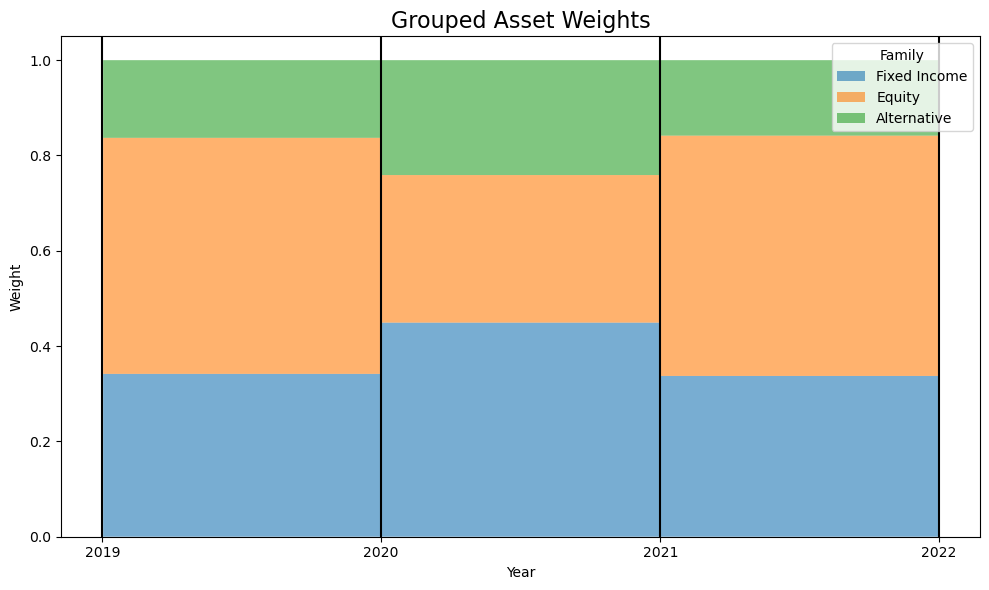

In [470]:
plt.figure(figsize=(10,6))
plt.stackplot(df6.index, df6['Fixed Income'], df6['Equity'], df6['Alternative'], 
              labels=['Fixed Income', 'Equity', 'Alternative'], alpha=0.6)

plt.title("Grouped Asset Weights", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Weight")
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), title='Family')

plt.grid(True, which='both', axis='x', linestyle='-', color='black', linewidth=1.5)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.tight_layout()
plt.show()

In 2019, the portfolio had a bigger weight on equities, reflecting a more aggressive investment strategy. However, in 2020, likely driven by the disruption caused by the pandemic, there was a strategic shift towards fixed income and alternative assets. This move seemed to be a response to the heightened uncertainty in the markets, with fixed income offering more stability and alternatives potentially serving as a hedge. The shift was likely aimed at balancing out the portfolio by reducing exposure to higher-risk assets, like equities, during a period of high market volatility. By 2021, with the resilience of the markets following the initial pandemic shock, the portfolio gradually returned to its original asset allocation, reflecting a recovery and confidence in the long-term outlook.

<h1 style="color: #FF8C00;">16 | Portfolio Analysis Conclusion</h1>

---

The portfolio displayed a strong performance over the analyzed period, with an overall positive trend and an annualized return of 10.336%. This result reflects a well-balanced mix of assets, combining stability and growth potential. The portfolio's volatility, measured at 9.93%, indicates a moderate risk profile, with a careful balance of safer, more stable assets alongside riskier, high-reward options.

In terms of asset performance, Asset 2 (with the highest volatility of 19.02%) and Asset 3 (18.53%) showed significant growth potential but with greater fluctuations, which is typical of assets in high-growth sectors such as technology and healthcare. These assets performed well in the recovery phase post-2020, with Asset 2 surging to 180% of its initial value. However, their volatility also suggests higher risk, making them better suited for investors with a higher risk tolerance seeking capital appreciation.

On the other hand, Assets 1 and 4, with lower volatility (4.78% and 5.29%, respectively), provided the stability the portfolio needed during times of market stress, particularly in 2020. Asset 1, in particular, was a key asset during the pandemic, providing a stable base and limiting potential losses when the portfolio value dropped significantly due to the pandemic-induced market crash.

Asset 5, though highly volatile, showed resilience, recovering sharply after the pandemic hit, ultimately growing to 140%. This asset's performance suggests that, while risky, it is a potential high-reward component for a portfolio, especially during market rebounds following crises.

Strategic asset allocation was particularly noteworthy in 2020. As the pandemic spread and market volatility surged, there was a notable shift toward fixed income and alternatives, such as Asset 1 and Asset 5. This move helped shield the portfolio from the extreme market downturn in the first quarter of 2020, with the portfolio value falling from 115% to 95%. By the end of the year, the portfolio had regained its losses and ended 2020 at 110%. The return to a more aggressive allocation towards equities in 2021 (with a stronger focus on Asset 2) reflects confidence in the market recovery post-pandemic.

Looking at the portfolio's cumulative returns, which fluctuated between 94% and 135%, we can see the portfolio's resilience in the face of uncertainty. Despite the turbulence during the first quarter of 2020, the portfolio’s recovery was swift, achieving a 35% growth by the end of 2021. The decision to shift allocations in response to market conditions, such as favoring fixed income during the peak of the pandemic, reflects a dynamic, well-thought-out strategy that aimed to both protect against losses and seize growth opportunities.

In conclusion, the portfolio demonstrated a well-executed balancing act, mitigating risk with stable assets while capturing upside potential from higher-growth assets. This resulted in strong overall returns with moderate volatility, making it a solid choice for investors seeking a steady, growth-oriented strategy during periods of market upheaval, such as the Covid-19 pandemic. The thoughtful adjustments made in 2020 helped to minimize risk during uncertain times, and the return to a more aggressive stance in 2021 maximized the gains as the market recovered.

In [472]:
df2.describe()

,Asset1,Asset2,Asset3,Asset4,Asset5
count,783.000000,783.000000,783.000000,783.000000,783.000000
mean,107.530311,136.069058,122.648284,108.058739,106.311010
std,2.961107,24.326566,12.830913,4.429221,16.050509
min,99.218176,86.828919,89.278752,90.050507,73.373944
25%,106.623904,115.900143,114.171540,105.222329,96.816663
50%,108.254503,128.686471,119.493177,107.846697,103.615642
75%,109.442357,156.317108,131.345029,112.273463,116.692867
max,111.921731,187.294202,152.514620,114.122074,139.614856
